In [74]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [75]:
def gen_poly_matrix(x,degree):
    
    #make polynomial matrix X
    degree=degree+1
    X=np.flip(np.vander(x,degree),axis=1)

    return X


In [76]:
def poly_fit(X, y):

    # Convert y to column vector
    Y = y.reshape((-1, 1))
            
    # OLS
    A = np.matmul(X.transpose(),X)
    b = np.matmul(X.transpose(),Y)
    weight = np.linalg.solve(A, b)
    
    
    y_pred = np.matmul(X, weight)

    return weight, y_pred



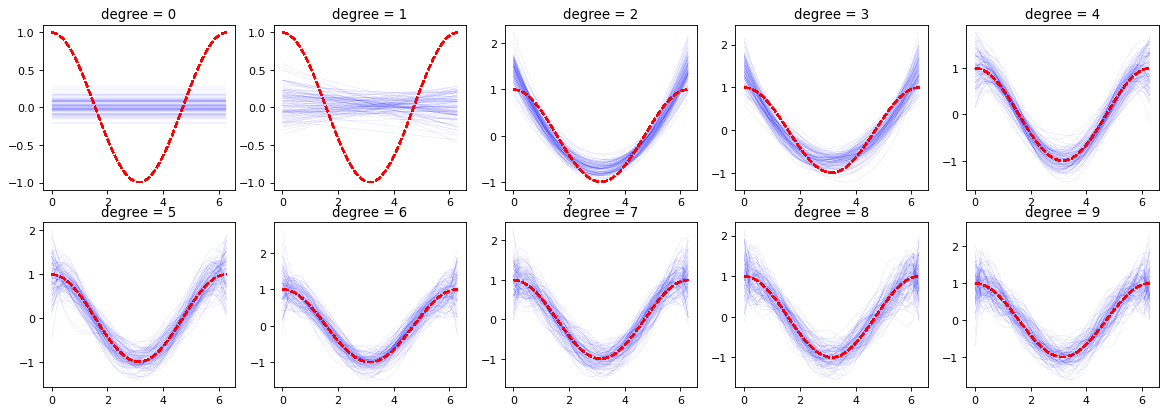

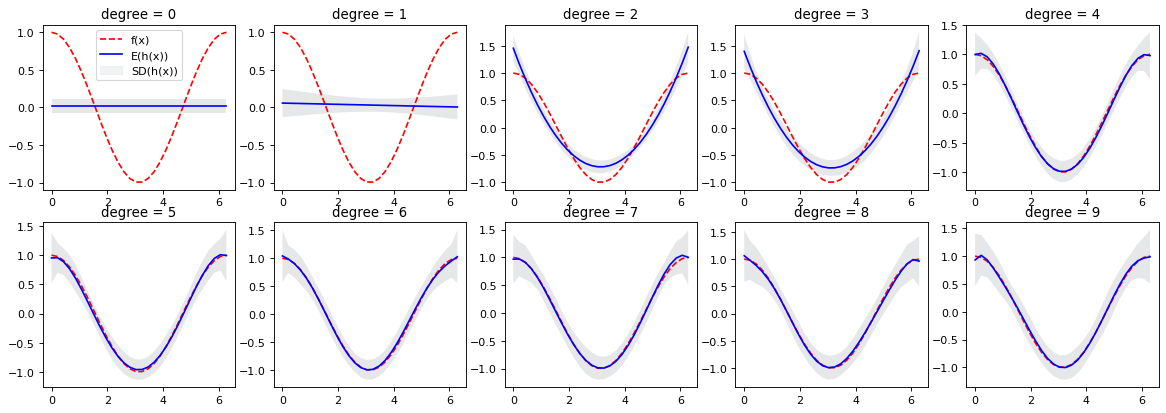

In [142]:
#------------------------------hyper parameters---------------------------------#
sample_num=30
max_degree=10
max_step_time=100

#------------------------------data generation---------------------------------#
#training data x
x_train=np.linspace(0,2*math.pi,sample_num)
y_true=np.cos(x_train)

#empty graph
fig1, axes1= plt.subplots(nrows=2, ncols=5, figsize=(max_degree+8, 6), dpi=80)
fig2, axes2= plt.subplots(nrows=2, ncols=5, figsize=(max_degree+8, 6), dpi=80)

#data for bar graph
mean_bias=[]
mean_variance=[]

for degree in range(max_degree):
    #empty {W} & {Y_train}
    W=np.zeros((1,1))
    Y_train=np.zeros((30,1))
    
    for i in range(max_step_time):
        #------------------------------data generation---------------------------------#
        
        # training data y
        loc,scale=0,0.5
        y_train = np.cos(x_train) + np.random.normal(loc,scale,sample_num)
        
        X_train = gen_poly_matrix(x_train, degree)
        weight, y_train_pred = poly_fit(X_train, y_train)
        
        #set graphs's location (row & col) of true model and prediction 
        if degree <5 : 
            row=0
        elif degree >=5:
            row=1
        col = degree % 5
        
        #plot data and model
        axes1[row,col].plot(x_train, np.cos(x_train), 'r--')
        axes1[row,col].plot(x_train, y_train_pred, 'b', lw=0.05)
        axes1[row,col].set_title('degree = ' + str(degree))
      
    
        if i==0:
            W=weight
            Y_train=y_train_pred

        else:
            W=np.concatenate([W,weight],axis=1)
            Y_train=np.concatenate([Y_train,y_train_pred],axis=1)

    #compute sample mean and standard deviation of y_train_prediction
    mean=np.mean(Y_train, axis=1)
    deviation=np.std(Y_train,axis=1)
   
    #compute bias^2 and variance
    bias=(mean-y_true)**2
    variance = deviation**2
    
    #compute average of bias and variance
    mean_bias.append(np.mean(bias))
    mean_variance.append(np.mean(variance))
    
    #set graphs's location (row & col) of mean & variance 
    if degree <5:
        row=0
    else:
        row=1
    col=degree%5
    
    
    #plot graph
    axes2[row,col].set_title('degree = ' + str(degree))
    f=axes2[row,col].plot(x_train, y_true, 'r--')
    m=axes2[row,col].plot(x_train, mean, 'b')
    axes2[row,col].fill_between(x_train,mean-deviation,mean+deviation,facecolor='#E5E7E9')
    SD= axes2[0,0].fill(np.NaN, np.NaN, color='#E5E7E9', alpha=0.5)
    
    #set legend
    axes2[0,0].legend(handles=[f[0],m[0],SD[0]],labels=['f(x)','E(h(x))','SD(h(x))'])

Text(0.5, 0, 'degree')

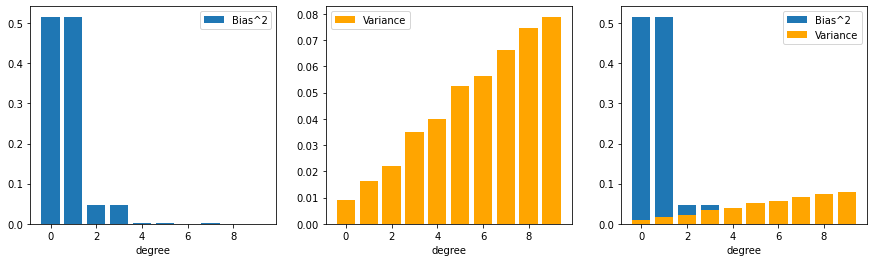

In [159]:
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 3,1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

x_degree=np.linspace(0,max_degree-1,10)


ax1.bar(x_degree,mean_bias,label='Bias^2')
ax1.legend()
ax1.set_xlabel('degree')

ax2.bar(x_degree,mean_variance,color='orange',label='Variance')
ax2.legend()
ax2.set_xlabel('degree')

ax3.bar(x_degree,mean_bias,label='Bias^2')
ax3.bar(x_degree,mean_variance,color='orange',label='Variance')
ax3.legend()
ax3.set_xlabel('degree')

    


